In [1]:
from color_code_stim import ColorCode

%load_ext autoreload
%autoreload 2

In [ ]:
cc = ColorCode(
    d=3,
    rounds=1,
    circuit_type="tri",
    p_circ=1e-2,
    perfect_logical_initialization=True,
    perfect_logical_measurement=True,
    perfect_first_syndrome_extraction=True,
)

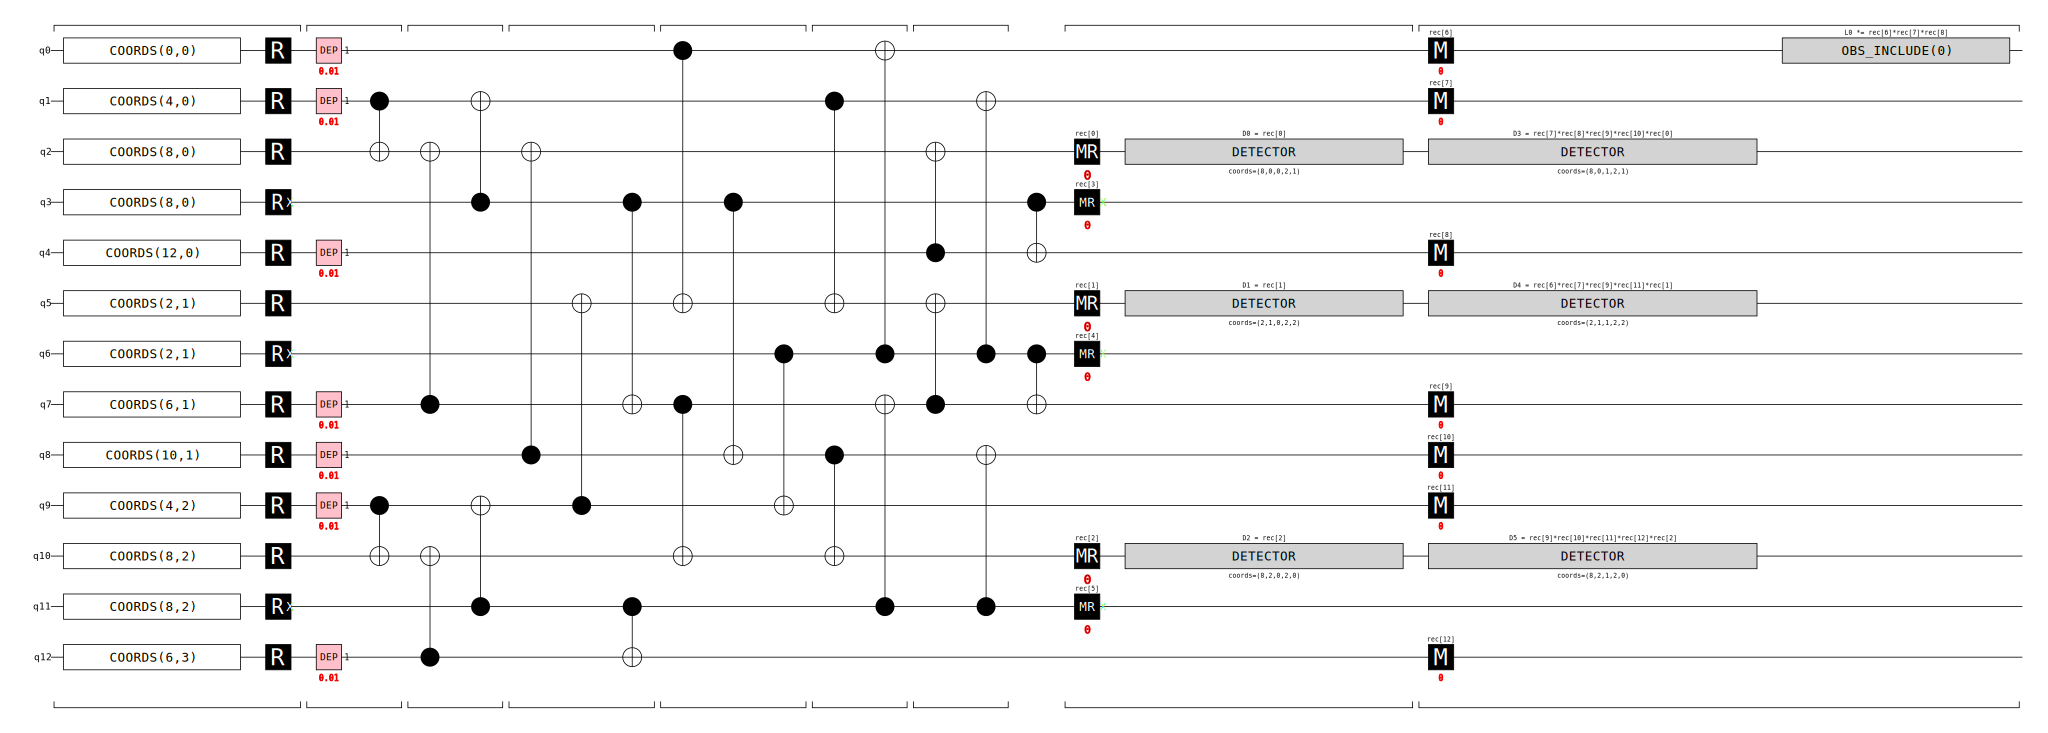

In [3]:
cc.circuit.diagram('timeline-svg')

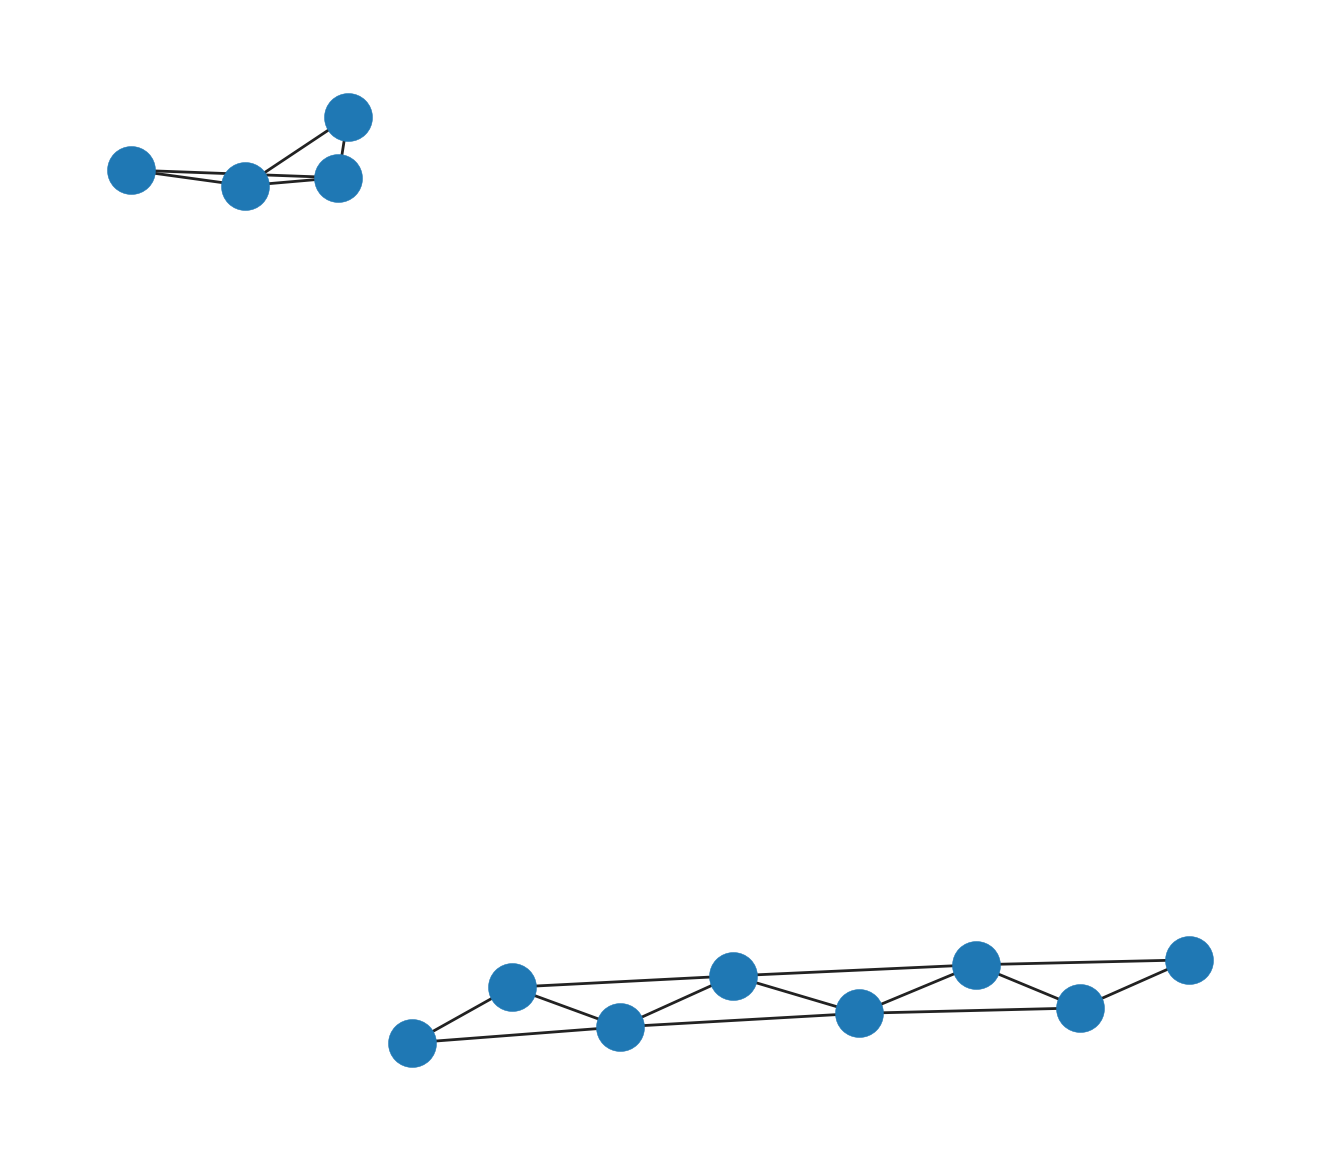

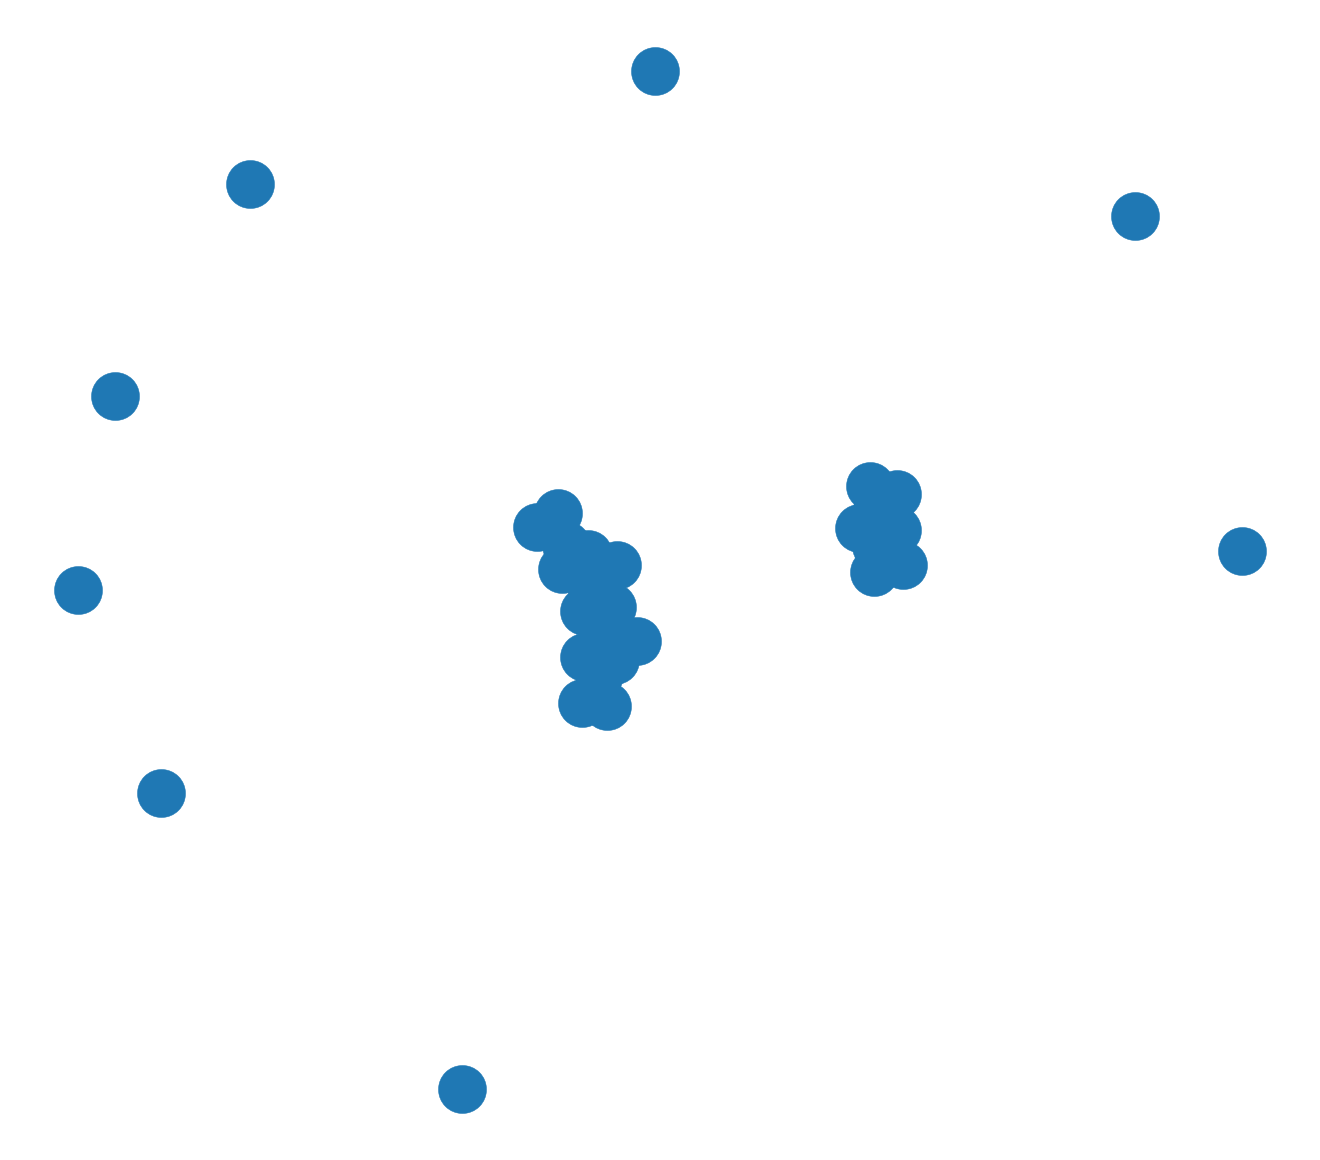

In [7]:
import networkx as nx
from pymatching import Matching

for i in [0, 1]:
    dem = cc.dems_decomposed["r"][i]
    matching = Matching.from_detector_error_model(dem)
    G = matching.to_networkx()
    G.remove_node(max(G.nodes))
    plt.figure()
    nx.draw(G)
    plt.show()

In [8]:
for d in range(3, 16, 2):
    cc = ColorCode(
        d=d,
        rounds=1,
        circuit_type="tri",
        p_bitflip=8.3e-2,
    )
    nfails, extra_outputs = cc.simulate(round(1e5))
    print(d, extra_outputs["stats"])

TypeError: cannot unpack non-iterable numpy.int64 object

In [720]:
cc = ColorCode(
    d=7, rounds=1, circuit_type="tri", p_bitflip=5e-2, comparative_decoding=True
)
det, obs, err = cc.sample_with_errors(shots=100000, seed=0)
pred, extra_outputs = cc.decode(
    det,
    full_output=True,
    erasure_matcher_predecoding=True,
    partial_correction_by_predecoding=False,
)
fail = obs ^ pred
print(fail.sum())

pred2, extra_outputs2 = cc.decode(
    det,
    full_output=True,
    erasure_matcher_predecoding=True,
    partial_correction_by_predecoding=True,
)
fail2 = obs ^ pred2
print(fail2.sum())

1587
2393


In [725]:
samples = np.nonzero(~fail & fail2)[0]
idx = samples[0]
idx

77

<Axes: >

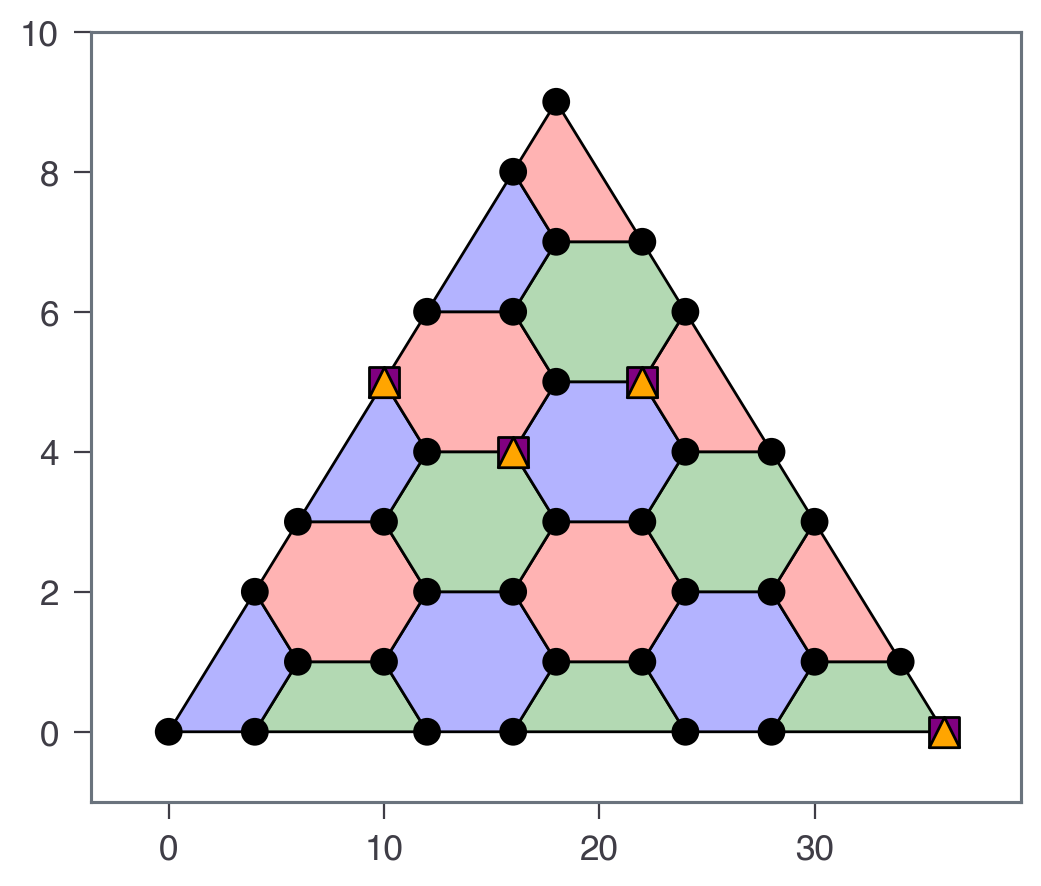

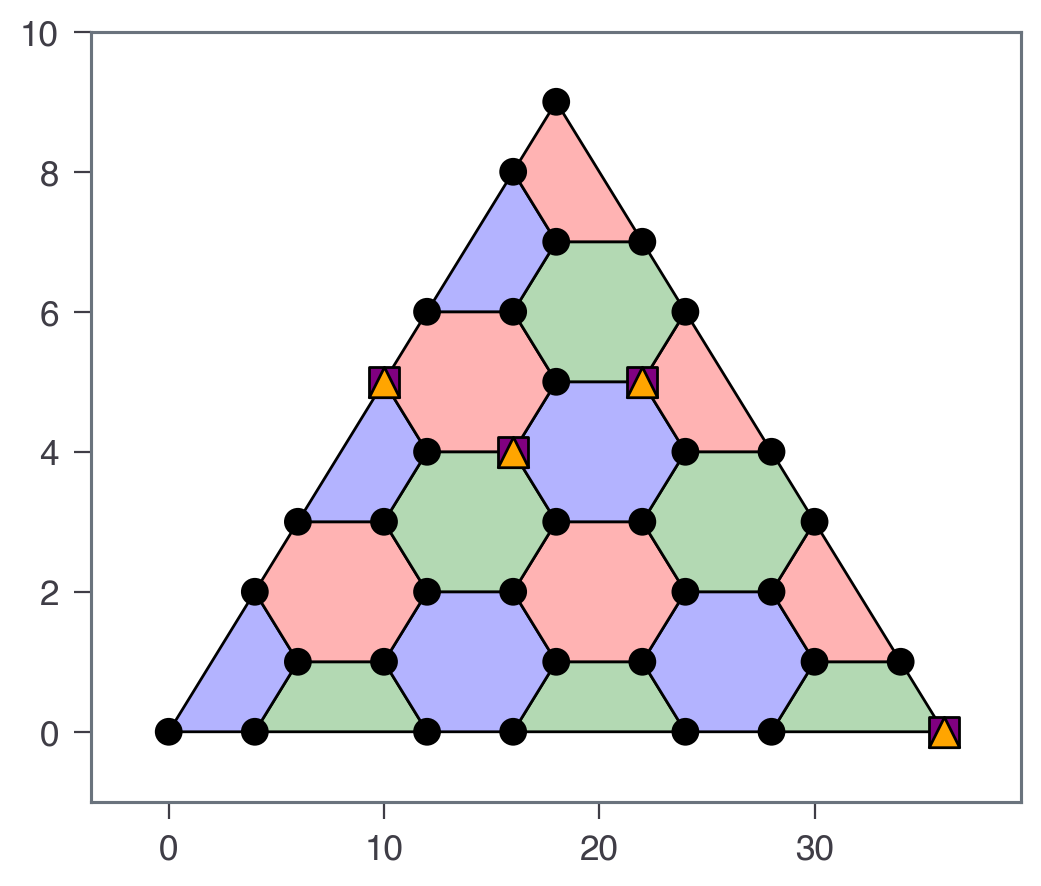

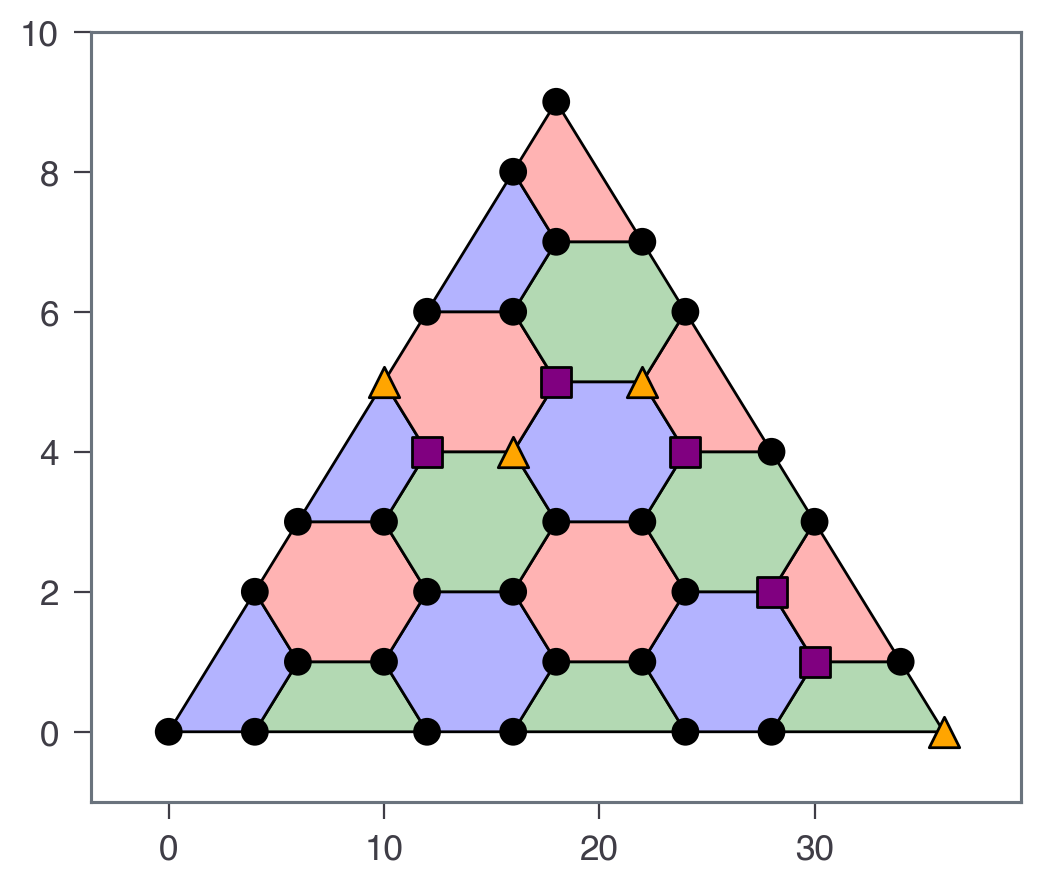

In [724]:
error_qubits = np.nonzero(cc.errors_to_qubits(err[idx]))[0]

preds_predecoding = np.nonzero(
    cc.errors_to_qubits(extra_outputs["predecoding_error_preds"][idx])
)[0]
cc.draw_lattice(
    show_axes=True,
    highlight_qubits=error_qubits,
    highlight_qubits2=preds_predecoding,
)

corr_qubits = np.nonzero(cc.errors_to_qubits(extra_outputs["error_preds"][idx]))[0]
cc.draw_lattice(
    show_axes=True,
    highlight_qubits=error_qubits,
    highlight_qubits2=corr_qubits,
)
corr_qubits2 = np.nonzero(cc.errors_to_qubits(extra_outputs2["error_preds"][idx]))[0]
cc.draw_lattice(
    show_axes=True,
    highlight_qubits=error_qubits,
    highlight_qubits2=corr_qubits2,
)

In [146]:
cc.dems_decomposed

{'r': (stim.DetectorErrorModel('''
      error(0.00577036) D0 L0
      error(0.00990703) D18 D2 L1 D1 D7 D26 D0 D19 D25
      error(0.000533333) D18 D2 D0 L2 D1 D19
      error(0.000533333) D18 D2 L3 D0 D1
      error(0.0119949) D18 D7 L4 D26 D0 D1 D19 D25
      error(0.00530833) D18 D2 D7 D26 D0 D25 L5
      error(0.000799787) D0 D18 D2 L6
      error(0.00206397) D0 D2 L7
      error(0.00159829) L8 D18 D7 D26 D0 D19 D25
      error(0.0103646) D18 D7 L9 D26 D0 D25
      error(0.00813842) D0 D18 L10
      error(0.00444978) D1 L11
      error(0.000533333) D18 D2 D7 D26 L12 D1 D19 D25
      error(0.0114738) L13 D7 D2 D26 D1 D19 D25
      error(0.0127106) D7 L14 D26 D1 D19 D25
      error(0.0117346) D2 L15
      error(0.00153227) D7 D2 D3 D26 D25 L16
      error(0.000533333) D18 D2 D7 D26 L17 D25
      error(0.00504411) L18 D7 D2 D26 D25
      error(0.00550674) L19 D3
      error(0.00781051) L20 D4
      error(0.0111481) D7 D26 L21 D5 D6 D25 D4
      error(0.0121906) D7 L22 D5 D25 D4
     